In [1]:
import os
import pickle
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
from sklearn.model_selection import KFold, train_test_split
from sklearn.neighbors import NearestNeighbors

In [2]:
with open('checkpoint_fold_9.pkl', 'rb') as f:
    d = pickle.load(f)

In [3]:
df = pd.DataFrame(d)
# df[df["metric_name"]=="adjusted cosine"]
df_CV = df\
    .groupby(
        [
            "metric_name",
            "n_neighbors"
        ]
    )\
    .agg(
        {
            "rmse": lambda x: np.linalg.norm(x, 2) / np.sqrt(len(x)),
            "mae": "mean"
        }
    )
metric_names = sorted(list(set(x[0] for x in df_CV.index)))
rmse_CV = df_CV.loc[:, "rmse"].unstack(1)
mae_CV = df_CV.loc[:, "mae"].unstack(1)

In [4]:
rmse_CV.transpose()

metric_name,adjusted cosine,cosine,deduct 2.5,deduct 2.75,deduct 2.9,deduct 3,"remap 1,5->-+1, 24->-+0.5, 3->0.25","remap 12->-1, 345->1"
n_neighbors,,,,,,,,
1,1.062602,1.151778,1.089011,1.075444,1.066243,1.059049,1.078836,1.122332
2,1.059402,1.155001,1.088164,1.072099,1.060446,1.051991,1.076371,1.122511
3,1.055087,1.151160,1.084795,1.067954,1.055614,1.046441,1.072655,1.118074
4,1.050107,1.146030,1.080990,1.063921,1.051418,1.041642,1.068955,1.113562
5,1.045002,1.141454,1.077371,1.060082,1.047169,1.037357,1.065207,1.109181
...,...,...,...,...,...,...,...,...
196,0.851165,1.029449,0.978167,0.958672,0.941940,0.928273,0.961399,1.005718
197,0.850893,1.029353,0.978040,0.958536,0.941839,0.928130,0.961277,1.005574
198,0.850645,1.029232,0.977922,0.958416,0.941734,0.928005,0.961152,1.005432


In [5]:
mae_CV.transpose()

metric_name,adjusted cosine,cosine,deduct 2.5,deduct 2.75,deduct 2.9,deduct 3,"remap 1,5->-+1, 24->-+0.5, 3->0.25","remap 12->-1, 345->1"
n_neighbors,,,,,,,,
1,0.862489,0.918351,0.871796,0.861252,0.853909,0.848128,0.863829,0.904111
2,0.855211,0.916260,0.864864,0.852102,0.842756,0.836034,0.855885,0.899047
3,0.848436,0.911053,0.858757,0.845299,0.835358,0.828042,0.849688,0.892641
4,0.841899,0.905543,0.853652,0.839866,0.829731,0.821831,0.844819,0.886987
5,0.835864,0.901137,0.849251,0.835221,0.824713,0.816666,0.840351,0.882102
...,...,...,...,...,...,...,...,...
196,0.668881,0.813211,0.767890,0.751873,0.738350,0.727195,0.757749,0.797277
197,0.668678,0.813145,0.767807,0.751780,0.738281,0.727102,0.757677,0.797180
198,0.668494,0.813066,0.767732,0.751706,0.738226,0.727025,0.757593,0.797081


The MAE are still decreasing for each metric even setting n_neighbors to 200, but the curve is flattened out (see below).

The best metric with best MAE, RMSE seems to be the `adjusted cosine`. `deduct 3` has the best next performance in these two metrics. 

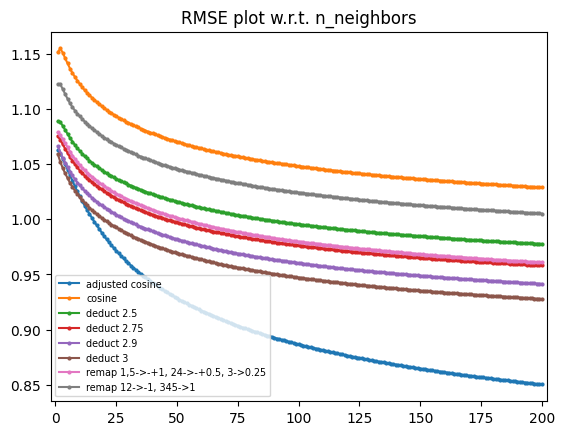

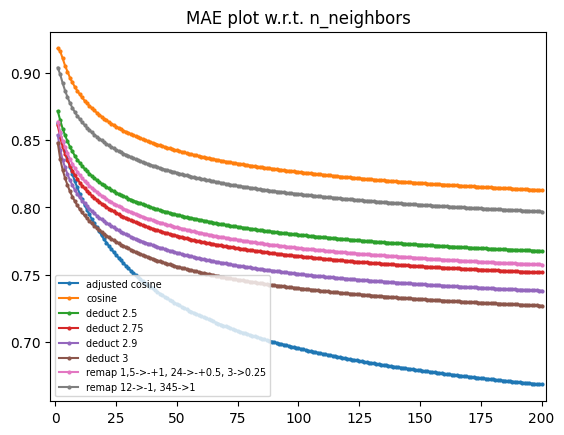

In [6]:
ax = plt.gca()
ax.set_title("RMSE plot w.r.t. n_neighbors")
for metric_name in rmse_CV.index:
    ax.plot(rmse_CV.loc[metric_name], marker='.', markersize=4, label=metric_name)
ax.legend(loc="lower left", fontsize="x-small")
ax.set_xlim([-2, 202])
plt.show()
ax = plt.gca()
ax.set_title("MAE plot w.r.t. n_neighbors")
for metric_name in mae_CV.index:
    ax.plot(mae_CV.loc[metric_name], marker='.', markersize=4, label=metric_name)
ax.legend(loc="lower left", fontsize="x-small")
ax.set_xlim([-2, 202])
plt.show()